In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('assets/motor_vehicle_collissions.csv', low_memory=False)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,12/11/2020,20:40,NaN,NaN,40.741074,-73.725800,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,Unspecified,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN
1,01/28/2021,20:10,NaN,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4390928,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,01/01/2021,19:27,BRONX,10458,40.856884,-73.885025,"(40.856884, -73.885025)",NaN,NaN,633 EAST 189 STREET,...,NaN,NaN,NaN,NaN,4381753,Sedan,NaN,NaN,NaN,NaN
3,02/02/2021,10:00,NaN,NaN,40.866333,-73.925010,"(40.866333, -73.92501)",BROADWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4388897,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,12/12/2020,2:54,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unsafe Speed,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [3]:
df.shape

(1769702, 29)

In [4]:
for col in df.columns:
    print(col)

CRASH DATE
CRASH TIME
BOROUGH
ZIP CODE
LATITUDE
LONGITUDE
LOCATION
ON STREET NAME
CROSS STREET NAME
OFF STREET NAME
NUMBER OF PERSONS INJURED
NUMBER OF PERSONS KILLED
NUMBER OF PEDESTRIANS INJURED
NUMBER OF PEDESTRIANS KILLED
NUMBER OF CYCLIST INJURED
NUMBER OF CYCLIST KILLED
NUMBER OF MOTORIST INJURED
NUMBER OF MOTORIST KILLED
CONTRIBUTING FACTOR VEHICLE 1
CONTRIBUTING FACTOR VEHICLE 2
CONTRIBUTING FACTOR VEHICLE 3
CONTRIBUTING FACTOR VEHICLE 4
CONTRIBUTING FACTOR VEHICLE 5
COLLISION_ID
VEHICLE TYPE CODE 1
VEHICLE TYPE CODE 2
VEHICLE TYPE CODE 3
VEHICLE TYPE CODE 4
VEHICLE TYPE CODE 5


In [5]:
#changing the column names
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
for col in df.columns:
    print(col)

crash_date
crash_time
borough
zip_code
latitude
longitude
location
on_street_name
cross_street_name
off_street_name
number_of_persons_injured
number_of_persons_killed
number_of_pedestrians_injured
number_of_pedestrians_killed
number_of_cyclist_injured
number_of_cyclist_killed
number_of_motorist_injured
number_of_motorist_killed
contributing_factor_vehicle_1
contributing_factor_vehicle_2
contributing_factor_vehicle_3
contributing_factor_vehicle_4
contributing_factor_vehicle_5
collision_id
vehicle_type_code_1
vehicle_type_code_2
vehicle_type_code_3
vehicle_type_code_4
vehicle_type_code_5


In [6]:
#datetime
df['crash_date'] = pd.to_datetime(df['crash_date'])
df.dtypes

crash_date                       datetime64[ns]
crash_time                               object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured               float64
number_of_persons_killed                float64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3           

In [7]:
#filter crash_date from 2019-2020 only
df = df.query('20181231 < crash_date < 20210101')
df

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2020-12-11,20:40,NaN,NaN,40.741074,-73.725800,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,Unspecified,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN
4,2020-12-12,2:54,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unsafe Speed,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,2020-12-23,18:03,BROOKLYN,11219,40.637054,-73.986430,"(40.637054, -73.98643)",14 AVENUE,43 STREET,NaN,...,NaN,NaN,NaN,NaN,4380252,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-12-05,18:42,NaN,NaN,40.801754,-73.931210,"(40.801754, -73.93121)",1 AVENUE,EAST 125 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4373655,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
12,2020-12-08,12:25,BROOKLYN,11203,40.653324,-73.938290,"(40.653324, -73.93829)",LINDEN BOULEVARD,EAST 42 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4374467,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457740,2019-01-02,10:00,BROOKLYN,11203,40.656483,-73.924080,"(40.656483, -73.92408)",REMSEN AVENUE,EAST 57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4060794,Sedan,NaN,NaN,NaN,NaN
457741,2019-01-01,18:20,BROOKLYN,11217,40.687770,-73.987010,"(40.68777, -73.98701)",ATLANTIC AVENUE,HOYT STREET,NaN,...,Unspecified,NaN,NaN,NaN,4062967,Sedan,NaN,NaN,NaN,NaN
457742,2019-01-03,3:45,BRONX,10468,40.860718,-73.900406,"(40.860718, -73.900406)",NaN,NaN,2396 MORRIS AVENUE,...,Unspecified,NaN,NaN,NaN,4060999,Sedan,Sedan,NaN,NaN,NaN
457743,2019-01-01,2:25,BROOKLYN,11208,40.665905,-73.877780,"(40.665905, -73.87778)",HEGEMAN AVENUE,SHEPHERD AVENUE,NaN,...,View Obstructed/Limited,NaN,NaN,NaN,4060746,Sedan,Sedan,NaN,NaN,NaN


In [103]:
df[df['collision_id']==4124171]

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,month,year
359730,2019-04-29,16:55,MANHATTAN,10009,40.727844,-73.98223,"(40.727844, -73.98223)",AVENUE A,EAST 10 STREET,NaN,...,NaN,NaN,4124171,Bike,NaN,NaN,NaN,NaN,4,2019


In [21]:
df = df.dropna(how='all')
df.isna().sum()

crash_date                            0
crash_time                            0
borough                          113662
zip_code                         113715
latitude                          26289
longitude                         26289
location                          26289
on_street_name                    80443
cross_street_name                166873
off_street_name                  243914
number_of_persons_injured             0
number_of_persons_killed              0
number_of_pedestrians_injured         0
number_of_pedestrians_killed          0
number_of_cyclist_injured             0
number_of_cyclist_killed              0
number_of_motorist_injured            0
number_of_motorist_killed             0
contributing_factor_vehicle_1      1246
contributing_factor_vehicle_2     57886
contributing_factor_vehicle_3    299527
contributing_factor_vehicle_4    318424
contributing_factor_vehicle_5    322678
collision_id                          0
vehicle_type_code_1                2451


In [36]:
#get rid of all the empty spaces at the end of street_names
df['on_street_name'] = df['on_street_name'].str.rstrip()
df['cross_street_name'] = df['cross_street_name'].str.rstrip()
df['off_street_name'] = df['off_street_name'].str.rstrip()

# Check the Locations that are missing zip, lat, lon

In [37]:
missing = df[['zip_code','latitude','longitude','location','on_street_name','cross_street_name','off_street_name']].copy()
missing = missing.dropna(how='all')

missing.head()

,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name
0,NaN,40.741074,-73.72580,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN
4,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN
7,11219,40.637054,-73.98643,"(40.637054, -73.98643)",14 AVENUE,43 STREET,NaN
8,NaN,40.801754,-73.93121,"(40.801754, -73.93121)",1 AVENUE,EAST 125 STREET,NaN
12,11203,40.653324,-73.93829,"(40.653324, -73.93829)",LINDEN BOULEVARD,EAST 42 STREET,NaN


In [25]:
missing_all = missing[(missing['zip_code'].isnull())&(missing['latitude'].isnull())&(missing['longitude'].isnull())&(missing['location'].isnull())]
missing_all.head()

,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name
4,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN
13,NaN,NaN,NaN,NaN,BRONX RIVER PARKWAY RAMP,NaN,NaN
88,NaN,NaN,NaN,NaN,GULF AVENUE,WESTERN AVENUE,NaN
162,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN
203,NaN,NaN,NaN,NaN,SPRINGFIELD BOULEVARD,NaN,NaN


In [101]:
missing_zip = missing[(missing['zip_code'].isnull())]
len(missing_zip)

113710

### Check the distributions

In [26]:
missing_all['on_street_name'].value_counts()

VERRAZANO BRIDGE UPPER              869
TRIBOROUGH BRIDGE                   621
BRONX WHITESTONE BRIDGE             532
BELT PARKWAY                        441
VANWYCK EXPRESSWAY                  412
                                   ... 
van wyck express way                  1
marcy ave                             1
1st highway                           1
Broadway & West 254st                 1
nothern boulevard                     1
Name: on_street_name, Length: 1877, dtype: int64

In [27]:
data2 = missing_all['on_street_name'].value_counts()
data2 = data2.to_frame().reset_index()

#get rid of the empty spaces at the end of collisions location
data2['index'] = data2['index'].str.rstrip()

data2.head()

,index,on_street_name
0,VERRAZANO BRIDGE UPPER,869
1,TRIBOROUGH BRIDGE,621
2,BRONX WHITESTONE BRIDGE,532
3,BELT PARKWAY,441
4,VANWYCK EXPRESSWAY,412


In [28]:
data2 = data2[data2['on_street_name'] >= 100]

In [105]:
len(data2.index.unique())

47

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

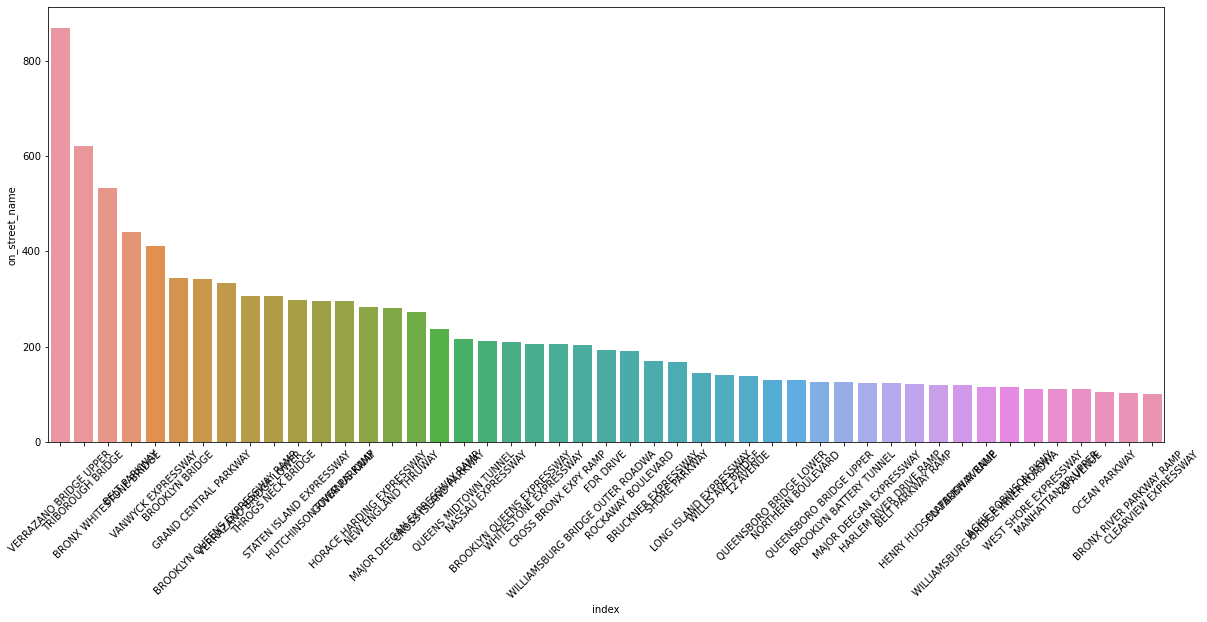

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

sns.barplot(x='index', y='on_street_name', data=data2, ax=ax)

fig,ax
plt.xticks(rotation=45)

In [35]:
#if it is needed, we can see the log scale distribution

# Back to the entire dataset, explore by month

In [47]:
df['month'] = df['crash_date'].dt.month
df['year'] = df['crash_date'].dt.year
df.month.unique()

array([12, 10,  9, 11,  8,  2,  1,  3,  7,  6,  5,  4])

In [91]:
pwd

'/Users/sheila/milestone1/projects'

In [97]:
col19 = df[df['year'] == 2019]
#col19.to_csv(r'/Users/sheila/milestone1/projects/assets/col19.csv', index=False)
col20 = df[df['year'] == 2020]
#col20.to_csv(r'/Users/sheila/milestone1/projects/assets/col20.csv', index=False)

In [95]:
col19.corr(method='pearson')

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,month,year
latitude,1.000000,-0.997970,0.000246,0.000953,0.001231,0.000751,0.002444,0.000091,-0.000793,0.000640,0.008784,0.009465,NaN
longitude,-0.997970,1.000000,-0.000939,-0.001304,-0.002041,-0.001061,-0.004004,-0.000605,0.000742,-0.000555,-0.007817,-0.008472,NaN
number_of_persons_injured,0.000246,-0.000939,1.000000,0.005263,0.269704,-0.002817,0.169952,-0.001732,0.916646,0.013142,0.019992,0.019144,NaN
number_of_persons_killed,0.000953,-0.001304,0.005263,1.000000,-0.000712,0.720600,-0.004213,0.347801,0.006801,0.605816,0.001698,0.001916,NaN
number_of_pedestrians_injured,0.001231,-0.002041,0.269704,-0.000712,1.000000,0.002879,-0.027606,-0.000941,-0.064341,-0.004076,0.014267,0.012718,NaN
number_of_pedestrians_killed,0.000751,-0.001061,-0.002817,0.720600,0.002879,1.000000,-0.003826,-0.000301,-0.003074,0.008650,0.003784,0.003770,NaN
number_of_cyclist_injured,0.002444,-0.004004,0.169952,-0.004213,-0.027606,-0.003826,1.000000,0.000685,-0.050083,-0.002858,0.020447,0.019240,NaN
number_of_cyclist_killed,0.000091,-0.000605,-0.001732,0.347801,-0.000941,-0.000301,0.000685,1.000000,-0.001653,-0.000225,-0.000364,-0.000434,NaN
number_of_motorist_injured,-0.000793,0.000742,0.916646,0.006801,-0.064341,-0.003074,-0.050083,-0.001653,1.000000,0.015968,0.011119,0.011040,NaN
number_of_motorist_killed,0.000640,-0.000555,0.013142,0.605816,-0.004076,0.008650,-0.002858,-0.000225,0.015968,1.000000,-0.001473,-0.001050,NaN


In [96]:
col20.corr(method='pearson')

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,month,year
latitude,1.000000,-0.997892,0.003186,-0.002960,-0.000859,-0.006790,-0.001616,0.000705,0.004165,0.001170,-0.012409,-0.007901,NaN
longitude,-0.997892,1.000000,-0.003473,0.003188,0.000238,0.006872,0.000287,-0.000742,-0.003823,-0.000918,0.011779,0.007317,NaN
number_of_persons_injured,0.003186,-0.003473,1.000000,0.014304,0.236379,-0.004536,0.199284,-0.006805,0.902687,0.025348,0.083273,0.088663,NaN
number_of_persons_killed,-0.002960,0.003188,0.014304,1.000000,-0.002663,0.588947,-0.009369,0.301144,0.018782,0.753522,0.012027,0.013256,NaN
number_of_pedestrians_injured,-0.000859,0.000238,0.236379,-0.002663,1.000000,0.003402,-0.044129,-0.001499,-0.084525,-0.005599,0.017164,0.017610,NaN
number_of_pedestrians_killed,-0.006790,0.006872,-0.004536,0.588947,0.003402,1.000000,-0.005356,-0.000472,-0.004262,0.006498,0.004706,0.005702,NaN
number_of_cyclist_injured,-0.001616,0.000287,0.199284,-0.009369,-0.044129,-0.005356,1.000000,-0.003509,-0.085829,-0.006909,0.073949,0.076127,NaN
number_of_cyclist_killed,0.000705,-0.000742,-0.006805,0.301144,-0.001499,-0.000472,-0.003509,1.000000,-0.005515,-0.000489,0.009076,0.009922,NaN
number_of_motorist_injured,0.004165,-0.003823,0.902687,0.018782,-0.084525,-0.004262,-0.085829,-0.005515,1.000000,0.030588,0.058287,0.063097,NaN
number_of_motorist_killed,0.001170,-0.000918,0.025348,0.753522,-0.005599,0.006498,-0.006909,-0.000489,0.030588,1.000000,0.008720,0.009242,NaN


# Injured and Killed

In [87]:
print(df.number_of_persons_injured.sum())
print(df.number_of_persons_killed.sum())

105970.0
512.0


In [89]:
print(df[df['year'] == 2019].number_of_persons_injured.sum())
print(df[df['year'] == 2019].number_of_persons_killed.sum())
print('_______________________________________________________')
print(df[df['year'] == 2020].number_of_persons_injured.sum())
print(df[df['year'] == 2020].number_of_persons_killed.sum())

61386.0
244.0
_______________________________________________________
44584.0
268.0


# Distribution of Vehicle Type Per Year

In [80]:
df.contributing_factor_vehicle_1.value_counts()

Driver Inattention/Distraction                           83792
Unspecified                                              78611
Following Too Closely                                    26688
Failure to Yield Right-of-Way                            21938
Backing Unsafely                                         13496
Passing or Lane Usage Improper                           13400
Passing Too Closely                                      12648
Other Vehicular                                           9646
Unsafe Lane Changing                                      9255
Turning Improperly                                        6660
Unsafe Speed                                              6169
Traffic Control Disregarded                               5896
Driver Inexperience                                       5187
Reaction to Uninvolved Vehicle                            5088
Alcohol Involvement                                       3715
Pavement Slippery                                      

In [81]:
vehicle19 = df[df['year'] == 2019].contributing_factor_vehicle_1.value_counts()
vehicle19

Driver Inattention/Distraction                           55186
Unspecified                                              49110
Following Too Closely                                    19099
Failure to Yield Right-of-Way                            14753
Backing Unsafely                                          9468
Passing or Lane Usage Improper                            9137
Passing Too Closely                                       8612
Unsafe Lane Changing                                      6681
Other Vehicular                                           6286
Turning Improperly                                        4554
Traffic Control Disregarded                               3371
Reaction to Uninvolved Vehicle                            3282
Driver Inexperience                                       3217
Unsafe Speed                                              2922
Alcohol Involvement                                       2157
View Obstructed/Limited                                

In [82]:
vehicle20 = df[df['year'] == 2020].contributing_factor_vehicle_1.value_counts()
vehicle20

Unspecified                                              29501
Driver Inattention/Distraction                           28606
Following Too Closely                                     7589
Failure to Yield Right-of-Way                             7185
Passing or Lane Usage Improper                            4263
Passing Too Closely                                       4036
Backing Unsafely                                          4028
Other Vehicular                                           3360
Unsafe Speed                                              3247
Unsafe Lane Changing                                      2574
Traffic Control Disregarded                               2525
Turning Improperly                                        2106
Driver Inexperience                                       1970
Reaction to Uninvolved Vehicle                            1806
Alcohol Involvement                                       1558
Pavement Slippery                                      

In [83]:
#let's compare factor 2
vehicle19 = df[df['year'] == 2019].contributing_factor_vehicle_2.value_counts()
vehicle19

Unspecified                                              147135
Driver Inattention/Distraction                            12711
Following Too Closely                                      3138
Other Vehicular                                            2863
Passing or Lane Usage Improper                             2146
Failure to Yield Right-of-Way                              1799
Passing Too Closely                                        1584
Unsafe Lane Changing                                       1090
Backing Unsafely                                            817
Traffic Control Disregarded                                 617
Unsafe Speed                                                613
Turning Improperly                                          570
Reaction to Uninvolved Vehicle                              554
Driver Inexperience                                         544
View Obstructed/Limited                                     411
Pavement Slippery                       

In [84]:
vehicle20 = df[df['year'] == 2020].contributing_factor_vehicle_2.value_counts()
vehicle20

Unspecified                                              74563
Driver Inattention/Distraction                            5393
Other Vehicular                                           1405
Following Too Closely                                     1369
Passing or Lane Usage Improper                             772
Failure to Yield Right-of-Way                              723
Passing Too Closely                                        540
Unsafe Speed                                               501
Traffic Control Disregarded                                430
Unsafe Lane Changing                                       412
Backing Unsafely                                           251
Turning Improperly                                         249
Driver Inexperience                                        239
Reaction to Uninvolved Vehicle                             235
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion      219
View Obstructed/Limited                                

In [42]:
#in total 2019-2020
df.vehicle_type_code_1.value_counts()

Sedan                                  147411
Station Wagon/Sport Utility Vehicle    120554
Taxi                                    13590
Pick-up Truck                            8958
Box Truck                                6266
                                        ...  
USPS VAN                                    1
CAT P                                       1
U HAUL TRU                                  1
Street Swe                                  1
SEGWA                                       1
Name: vehicle_type_code_1, Length: 652, dtype: int64

In [44]:
vehicle19 = df[df['year'] == 2019].vehicle_type_code_1.value_counts()
vehicle19

Sedan                                  94663
Station Wagon/Sport Utility Vehicle    79846
Taxi                                    9823
Pick-up Truck                           6278
Box Truck                               4220
                                       ...  
pedicab                                    1
unkow                                      1
posta                                      1
acces                                      1
SEGWA                                      1
Name: vehicle_type_code_1, Length: 383, dtype: int64

In [45]:
vehicle20 = df[df['year'] == 2020].vehicle_type_code_1.value_counts()
vehicle20

Sedan                                  52748
Station Wagon/Sport Utility Vehicle    40708
Taxi                                    3767
Pick-up Truck                           2680
Box Truck                               2046
                                       ...  
FDNY #226                                  1
MOVING VAN                                 1
MTA truck                                  1
box                                        1
PICKUP TRU                                 1
Name: vehicle_type_code_1, Length: 384, dtype: int64

In [ ]:
data2 = data2[data2['on_street_name'] >= 100]

In [75]:
vehicle19_01 = (df[(df.year == 2019)&(df.month == 1)].vehicle_type_code_1.value_counts()).to_frame().reset_index()
#vehicle19_01 = vehicle19_01.to_frame().reset_index()

vehicle19_01.vehicle_type_code_1.min()

1

In [78]:
vehicle19_01 = vehicle19_01[vehicle19_01['vehicle_type_code_1'] >= 10]
vehicle19_01

,index,vehicle_type_code_1
0,Sedan,7851
1,Station Wagon/Sport Utility Vehicle,6210
2,Taxi,871
3,Pick-up Truck,504
4,Box Truck,327
5,Bus,290
6,Tractor Truck Diesel,124
7,Van,96
8,Bike,64
9,Convertible,45


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

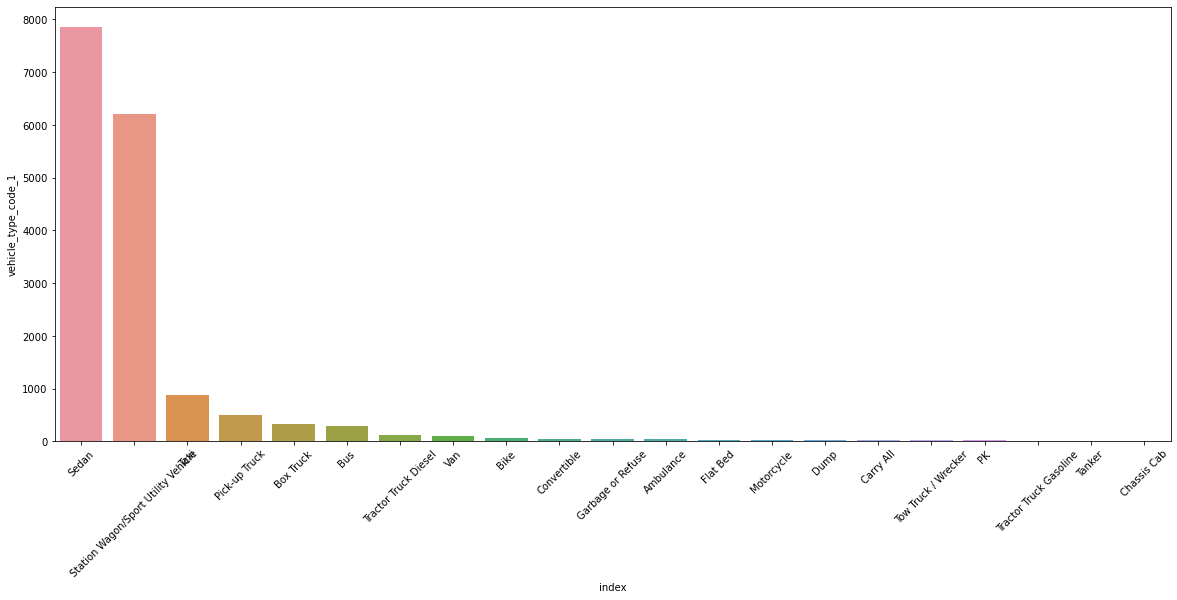

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

sns.barplot(x='index', y='vehicle_type_code_1', data=vehicle19_01, ax=ax)

fig,ax
plt.xticks(rotation=45)

In [67]:
vehicle19_02 = (df[(df.year == 2019)&(df.month == 2)].vehicle_type_code_1.value_counts())
vehicle19_02

Sedan                                  7230
Station Wagon/Sport Utility Vehicle    6157
Taxi                                    831
Pick-up Truck                           442
Box Truck                               302
                                       ... 
Mail                                      1
BK                                        1
COMM                                      1
PSD                                       1
US Po                                     1
Name: vehicle_type_code_1, Length: 98, dtype: int64

In [61]:
### WRITE THE PROPER LOOP PLEASE 
for i in range(0,12,1):
    vehicle19_01 = vehicle19_01.append(df[(df.year == 2019)|(df.month == i)].vehicle_type_code_1.value_counts())
vehicle19_01

AttributeError: 'NoneType' object has no attribute 'append'

# UNUSED CODE - IGNORE!!!!!

In [9]:
df.on_street_name.unique()

array(['CROSS ISLAND PARKWAY            ',
       'STATEN ISLAND EXPRESSWAY        ',
       '14 AVENUE                       ', ...,
       'ROE STREET                      ',
       'CLOVE LAKE PLACE                ',
       'westchester avenue              '], dtype=object)

In [40]:
#get rid of all the empty spaces at the end of street_names
df['on_street_name'] = df['on_street_name'].str.rstrip()
df['cross_street_name'] = df['cross_street_name'].str.rstrip()
df['off_street_name'] = df['off_street_name'].str.rstrip()

In [41]:
df.iloc[1]

crash_date                                                01/28/2021
crash_time                                                     20:10
borough                                                          NaN
zip_code                                                         NaN
latitude                                                         NaN
longitude                                                        NaN
location                                                         NaN
on_street_name                                 QUEENS MIDTOWN TUNNEL
cross_street_name                                                NaN
off_street_name                                                  NaN
number_of_persons_injured                                          0
number_of_persons_killed                                           0
number_of_pedestrians_injured                                      0
number_of_pedestrians_killed                                       0
number_of_cyclist_injured         

In [42]:
df[df['on_street_name'].isna()]

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
2,01/01/2021,19:27,BRONX,10458,40.856884,-73.885025,"(40.856884, -73.885025)",NaN,NaN,633 EAST 189 STREET,...,NaN,NaN,NaN,NaN,4381753,Sedan,NaN,NaN,NaN,NaN
14,12/19/2020,16:09,QUEENS,11416,40.684597,-73.844820,"(40.684597, -73.84482)",NaN,NaN,96-04 101 AVENUE,...,Unspecified,NaN,NaN,NaN,4377792,Sedan,Sedan,NaN,NaN,NaN
16,01/28/2021,23:55,BROOKLYN,11207,40.673790,-73.896370,"(40.67379, -73.89637)",NaN,NaN,164 PENNSYLVANIA AVENUE,...,Unspecified,NaN,NaN,NaN,4387572,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
22,01/30/2021,5:35,BRONX,10451,40.808056,-73.931410,"(40.808056, -73.93141)",NaN,NaN,2417 3 AVENUE,...,Unspecified,NaN,NaN,NaN,4387864,Station Wagon/Sport Utility Vehicle,Tractor Truck Diesel,NaN,NaN,NaN
31,12/26/2020,16:13,BROOKLYN,11239,40.651302,-73.869804,"(40.651302, -73.869804)",NaN,NaN,509 GATEWAY DRIVE,...,Unspecified,Unspecified,NaN,NaN,4379636,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769674,08/06/2012,20:12,NaN,NaN,40.767189,-73.899815,"(40.7671891, -73.8998149)",NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3102083,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1769675,08/09/2012,15:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERIDIAN RD FMP,...,Unspecified,NaN,NaN,NaN,255268,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1769680,08/07/2012,23:30,NaN,NaN,40.666590,-73.808082,"(40.6665898, -73.8080825)",NaN,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,3023383,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN
1769684,08/09/2012,18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unspecified,NaN,NaN,NaN,2836663,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN


(1769702, 29)

In [50]:
test = df.copy()
test['dt']= test['crash_date'] + ' ' + test['crash_time']
test.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,dt
0,12/11/2020,20:40,NaN,NaN,40.741074,-73.725800,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN,12/11/2020 20:40
1,01/28/2021,20:10,NaN,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN,...,NaN,NaN,NaN,4390928,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,01/28/2021 20:10
2,01/01/2021,19:27,BRONX,10458,40.856884,-73.885025,"(40.856884, -73.885025)",NaN,NaN,633 EAST 189 STREET,...,NaN,NaN,NaN,4381753,Sedan,NaN,NaN,NaN,NaN,01/01/2021 19:27
3,02/02/2021,10:00,NaN,NaN,40.866333,-73.925010,"(40.866333, -73.92501)",BROADWAY,NaN,NaN,...,NaN,NaN,NaN,4388897,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,02/02/2021 10:00
4,12/12/2020,2:54,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,12/12/2020 2:54


In [51]:
test['dt'] = pd.to_datetime(test['dt'])
test.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,dt
0,12/11/2020,20:40,NaN,NaN,40.741074,-73.725800,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN,2020-12-11 20:40:00
1,01/28/2021,20:10,NaN,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN,...,NaN,NaN,NaN,4390928,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-01-28 20:10:00
2,01/01/2021,19:27,BRONX,10458,40.856884,-73.885025,"(40.856884, -73.885025)",NaN,NaN,633 EAST 189 STREET,...,NaN,NaN,NaN,4381753,Sedan,NaN,NaN,NaN,NaN,2021-01-01 19:27:00
3,02/02/2021,10:00,NaN,NaN,40.866333,-73.925010,"(40.866333, -73.92501)",BROADWAY,NaN,NaN,...,NaN,NaN,NaN,4388897,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-02-02 10:00:00
4,12/12/2020,2:54,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-12-12 02:54:00


In [47]:
test['c_date'] = pd.to_datetime(test['dt'], format='%Y:%M:%D').dt.date
test['c_time'] = pd.to_datetime(test['dt'], format='%Y:%M:%D').dt.time
test.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,dt,c_date,c_time
0,12/11/2020,20:40,NaN,NaN,40.741074,-73.725800,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN,2020-12-11 20:40:00,2020-12-11,20:40:00
1,01/28/2021,20:10,NaN,NaN,NaN,NaN,NaN,QUEENS MIDTOWN TUNNEL,NaN,NaN,...,NaN,4390928,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-01-28 20:10:00,2021-01-28,20:10:00
2,01/01/2021,19:27,BRONX,10458,40.856884,-73.885025,"(40.856884, -73.885025)",NaN,NaN,633 EAST 189 STREET,...,NaN,4381753,Sedan,NaN,NaN,NaN,NaN,2021-01-01 19:27:00,2021-01-01,19:27:00
3,02/02/2021,10:00,NaN,NaN,40.866333,-73.925010,"(40.866333, -73.92501)",BROADWAY,NaN,NaN,...,NaN,4388897,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-02-02 10:00:00,2021-02-02,10:00:00
4,12/12/2020,2:54,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-12-12 02:54:00,2020-12-12,02:54:00


In [48]:
test.dtypes

crash_date                               object
crash_time                               object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured               float64
number_of_persons_killed                float64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3           

In [33]:
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M')

In [17]:
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2020-12-11,1900-01-01 20:40:00,NaN,NaN,40.741074,-73.72580,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,Unspecified,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN
4,2020-12-12,1900-01-01 02:54:00,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,Unsafe Speed,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
7,2020-12-23,1900-01-01 18:03:00,BROOKLYN,11219,40.637054,-73.98643,"(40.637054, -73.98643)",14 AVENUE,43 STREET,NaN,...,NaN,NaN,NaN,NaN,4380252,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-12-05,1900-01-01 18:42:00,NaN,NaN,40.801754,-73.93121,"(40.801754, -73.93121)",1 AVENUE,EAST 125 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4373655,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
12,2020-12-08,1900-01-01 12:25:00,BROOKLYN,11203,40.653324,-73.93829,"(40.653324, -73.93829)",LINDEN BOULEVARD,EAST 42 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4374467,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [22]:
df['Time'],df['Date']= df['crash_time'].apply(lambda x:x.time()), df['crash_time'].apply(lambda x:x.date())
df = df.drop(columns=['Date'])
df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,Time
0,2020-12-11,1900-01-01 20:40:00,NaN,NaN,40.741074,-73.72580,"(40.741074, -73.7258)",CROSS ISLAND PARKWAY,UNION TURNPIKE,NaN,...,NaN,NaN,NaN,4375244,Sedan,Sedan,NaN,NaN,NaN,20:40:00
4,2020-12-12,1900-01-01 02:54:00,NaN,NaN,NaN,NaN,NaN,STATEN ISLAND EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4376234,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,02:54:00
7,2020-12-23,1900-01-01 18:03:00,BROOKLYN,11219,40.637054,-73.98643,"(40.637054, -73.98643)",14 AVENUE,43 STREET,NaN,...,NaN,NaN,NaN,4380252,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,18:03:00
8,2020-12-05,1900-01-01 18:42:00,NaN,NaN,40.801754,-73.93121,"(40.801754, -73.93121)",1 AVENUE,EAST 125 STREET,NaN,...,NaN,NaN,NaN,4373655,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,18:42:00
12,2020-12-08,1900-01-01 12:25:00,BROOKLYN,11203,40.653324,-73.93829,"(40.653324, -73.93829)",LINDEN BOULEVARD,EAST 42 STREET,NaN,...,NaN,NaN,NaN,4374467,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,12:25:00
